# Happiness Score
![Happiness Score](https://peopledevelopmentmagazine.com/wp-content/uploads/2014/02/International-Day-of-Happiness-Logo-690x686.png)

## Description 
The World Happiness Report is a landmark survey of the state of global happiness.   
The dataset is obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness) and the data is modified to only contain the 2015-2017 report for simplicity and avoiding the missing value.  

## Objective 
The goal of this data analysis is to identify the factor that contributes to the happiness of the country. 

## Content  
The column descriptions are as follows:  
Country - Name of the country    
Happiness Rank - Rank of the country based on the Happiness Score.    
Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."    
Economy - The extent to which GDP contributes to the calculation of the Happiness Score. (Economic production)  
Family - The extent to which Family contributes to the calculation of the Happiness Score (Social Support)    
Health - The extent to which Life expectancy contributed to the calculation of the Happiness Score. (Life Expectancy)  
Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.   
Trust - The extent to which the Perception of Corruption contributes to the happiness score. (Absence of corruption)  
Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.   
Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.    
Year - Year the survey result was collected   

The dystopia is an imaginary country, which has the values equal to the world's lowest national averages for each of the six factors, i.e. lowest GDP, lowest social support, least life expectancy, and so on.  
The purpose of dystopia is to have a benchmark because no country can perform worse than dystopia.   
The residual, or unexplained components, is the numerical value that either over- or under-explain the average of each six variables.  

Formula to calculate the Happiness Score is:  
$Happiness Score = Economic + Family + Health + Freedom + Trust + Generosity + Dystopia Residual$  


In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [28]:
df = pd.read_csv('World_Happiness_2015_2017.csv')
print("Packge Imported, data read")

Packge Imported, data read


Exploring the Data:  
1. Display first 5 rows  
2. Concise summary of data  
3. Statistical summary    
4. Check null values   

In [29]:
def overview(df):
    print("-----------------------------First 5 Rows-----------------------------")
    # Display in Ipython format
    display(df.head())
    print("-----------------------------Concise Summary-----------------------------")
    # info() method do not require display() 
    df.info()
    print("-----------------------------Statistical Summary-----------------------------")
    display(df.describe())
    print("-----------------------------Null Values-----------------------------")
    percent = (df.isnull().mean().sort_values(ascending=False)*100).map(lambda row: '%.2f' % row)
    # sum to get the counts
    total = df.isnull().sum().sort_values(ascending=False)
    # Create single data frame to represent the missng values results
    display(pd.concat([total,percent], axis = 1, keys=['Total','%']))

overview(df)

-----------------------------First 5 Rows-----------------------------


Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
0  Switzerland               1            7.587                   1.39651   
1      Iceland               2            7.561                   1.30232   
2      Denmark               3            7.527                   1.32548   
3       Norway               4            7.522                   1.45900   
4       Canada               5            7.427                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  Year  
0     0.29678            2.51738  2015  
1     0.43630            2.70201  2015  
2     0.34139            2.49204  2015  
3     0.34699            2.46531  2015  
4     0.45811            2.45176  2015

-----------------------------Concise Summary-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Happiness Rank                 470 non-null    int64  
 2   Happiness Score                470 non-null    float64
 3   Economy (GDP per Capita)       470 non-null    float64
 4   Family                         470 non-null    float64
 5   Health (Life Expectancy)       470 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Trust (Government Corruption)  470 non-null    float64
 8   Generosity                     470 non-null    float64
 9   Dystopia Residual              470 non-null    float64
 10  Year                           470 non-null    int64  
dtypes: float64(8), int64(2), object(1)
m

Happiness Rank  Happiness Score  Economy (GDP per Capita)      Family  \
count      470.000000       470.000000                470.000000  470.000000   
mean        78.829787         5.370728                  0.927830    0.990347   
std         45.281408         1.136998                  0.415584    0.318707   
min          1.000000         2.693000                  0.000000    0.000000   
25%         40.000000         4.509000                  0.605292    0.793000   
50%         79.000000         5.282500                  0.995439    1.025665   
75%        118.000000         6.233750                  1.252443    1.228745   
max        158.000000         7.587000                  1.870766    1.610574   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                470.000000  470.000000                     470.000000   
mean                   0.579968    0.402828                       0.175605   
std                    0.240161    0.150356                       0.131909   
min                    0.000000    0.000000                       0.000000   
25%                    0.402301    0.297615                       0.075792   
50%                    0.630053    0.418347                       0.139081   
75%                    0.768298    0.516850                       0.249839   
max                    1.025250    0.669730                       0.838075   

       Generosity  Dystopia Residual         Year  
count  470.000000         470.000000   470.000000  
mean     0.201426           2.092717  2015.993617  
std      0.133211           0.565772     0.816907  
min      0.000000           0.328580  2015.000000  
25%      0.098303           1.737975  2015.000000  
50%      0.181624           2.094640  2016.000000  
75%      0.275505           2.455575  2017.000000  
max      0.819710           3.837720  2017.000000

-----------------------------Null Values-----------------------------


Total     %
Year                               0  0.00
Dystopia Residual                  0  0.00
Generosity                         0  0.00
Trust (Government Corruption)      0  0.00
Freedom                            0  0.00
Health (Life Expectancy)           0  0.00
Family                             0  0.00
Economy (GDP per Capita)           0  0.00
Happiness Score                    0  0.00
Happiness Rank                     0  0.00
Country                            0  0.00

- First 5 rows: Seems like the data is clean, all in numerical, no need to convert
- Concise summary: We can confirm that all the columns are in correct data types  
- Statistical summary: There are 470 data counts, because it is each country over the 3 years  
- Null values: There is no null value in this data set. 

## Pairwise Plot
Pairwise plot shows:
- Histogram: distribution of the category
- Scatter plot: correlation between two categories

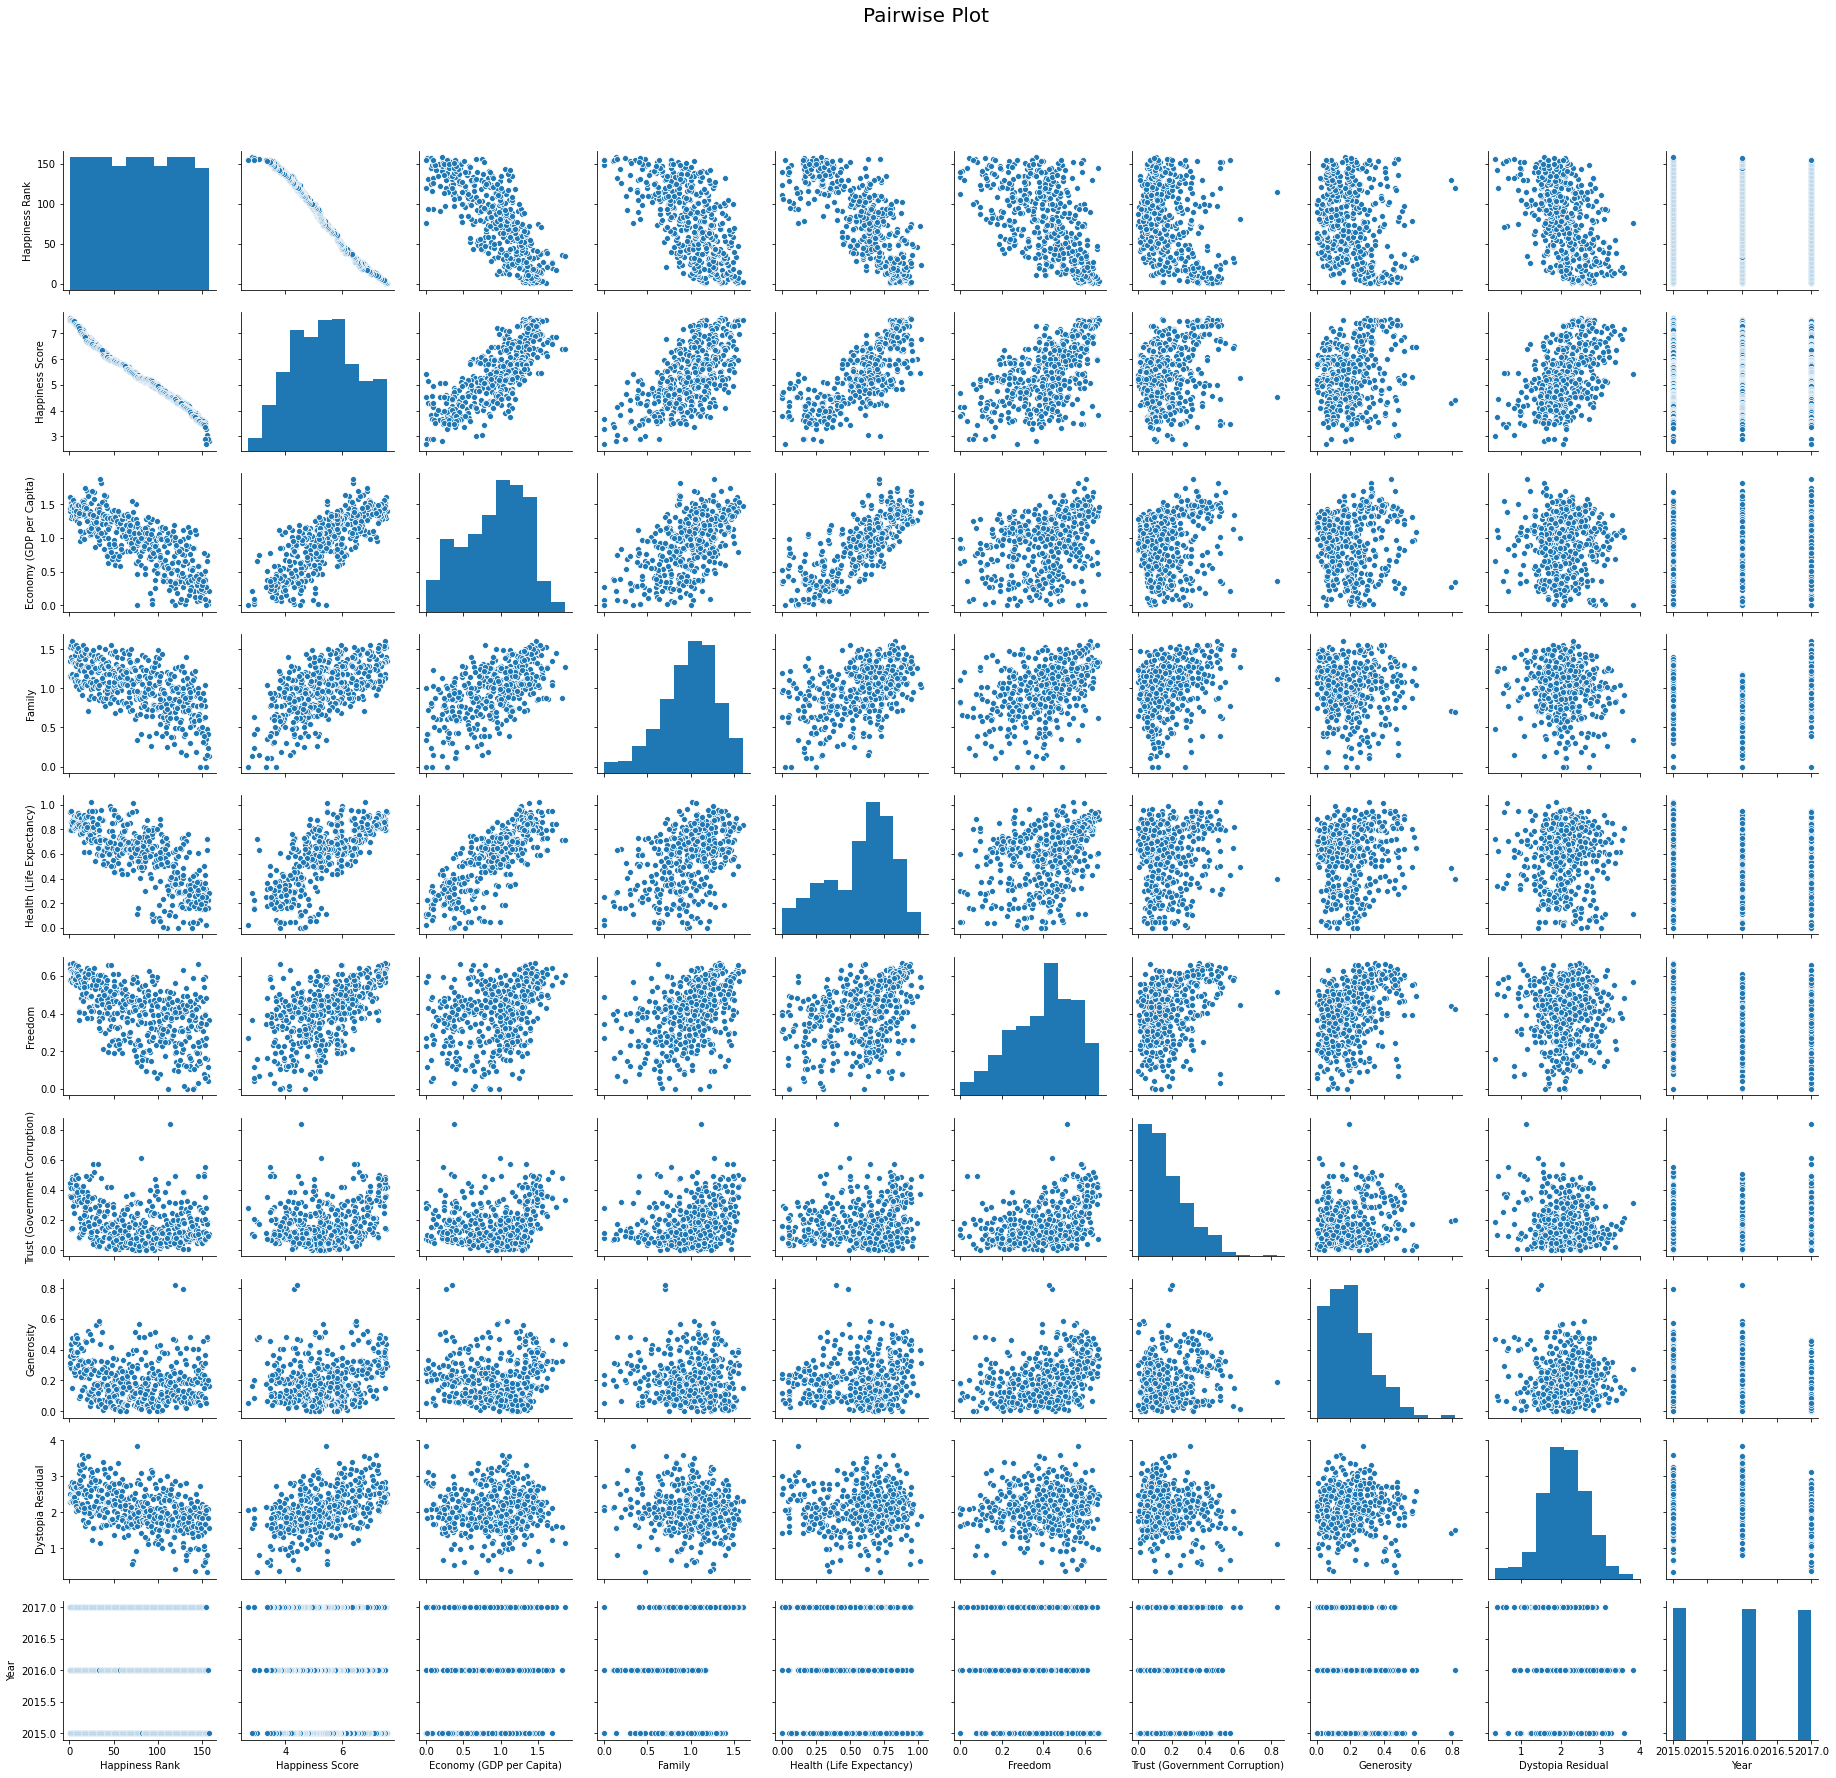

In [34]:
g = sns.pairplot(df)
g.fig.suptitle('Pairwise Plot', fontsize=20)
g.fig.subplots_adjust(top=0.9)

Above is a summary of the correlation between two features in this data.  
The diagonal part represents the distribution of the data for a specific feature.  
For example, the "Year" only has 2015, 2016, and 2017, hence the distribution plot looks quite strange with three equal-size vertical bars.  
The other graphs, you can see the big picture of the attributes, for example, if you look at the economy row with the happiness score column, you can see that there is a positive correlation, meaning that as the economy grow, people's happiness score grow as well. 

## Correlation Analysis
### $R$ and $R^2$: Table

$R$ and $R^2$ values tells the correlation between two attributes

In [41]:
# check the relationship between happiness score and other attributes
# Store necessary columns
attribute = data.loc[:,'Happiness Score':"Dystopia Residual"].copy()
# Calculate r and sort value descending
r = attribute.corr()['Happiness Score'].sort_values(ascending=False)
# Calculate r squared
r_squared = r**2
# Concatinate to create a single table
r_table = pd.concat([r,r_squared],axis=1, keys=['R','R^2'])
# Conditional background formatting
r_table.style.background_gradient(cmap="coolwarm",subset=['R','R^2']).set_precision(3)
# factors = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
# corr_data = data[factors]
# corr_data.corr()

This is the $R$ and $R^2$-value, representing the correlation between happiness score and other features.     
$R$-value is quite vague in terms of gaining the understanding, and that is why the $R^2$-value helps to give a better understanding.     
For example, the economy is twice as more effective in terms of increasing people's happiness scores compare to freedom.  
Since the dystopia residual is the baseline for this r value we can see that the Trust and generosity are not reliable sources for the correlation since it is lower than the Dystopia residual.  

But why government corruption and generosity do not affect people's happiness? Well, anecdotally, even if the government is corrupted or not corrupted, the people do not care. Because many people do not heavily rely on government. And also, even if somebody is generous to you, that does not pay the rent or fill your stomach. In fact, money is quite a big factor in happiness, because if one has money, one usually does not have a problem in life. If one is living paycheck to paycheck, they don't care if the government is going to help the person or not, rather, they will be concerned about there payment. 

### $R$ and $R^2$: Bar Graph

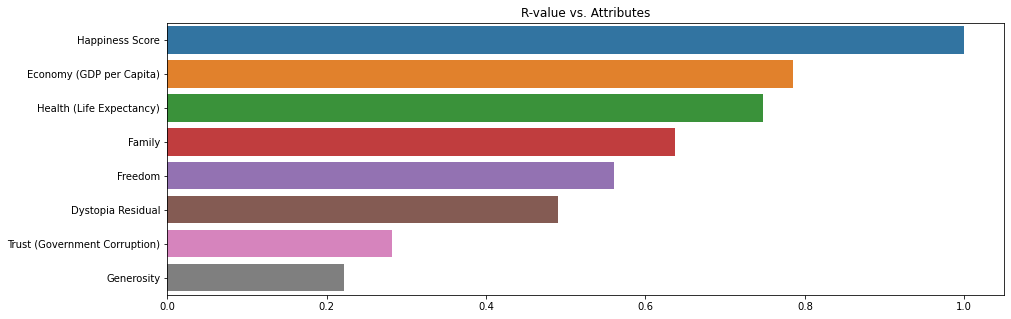

In [44]:
# Create a function to plot r and r^2
def barplot(data,title):
    plt.figure(figsize=(15,5))
    g = sns.barplot(y=data.index, x=data.values)
    g.set_title(title)

barplot(r,'R-value vs. Features')

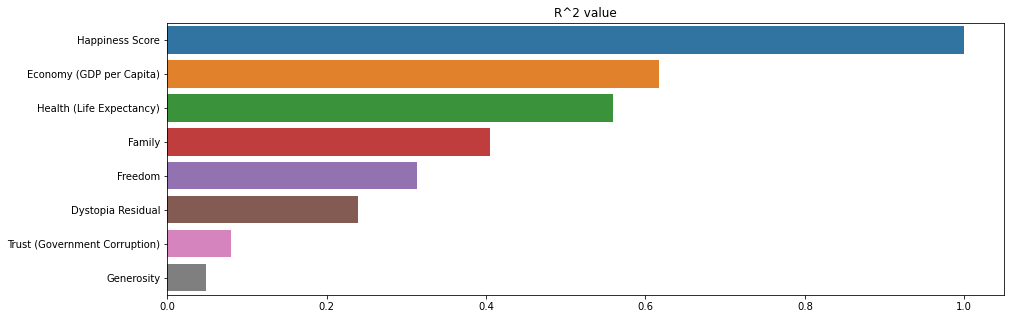

In [45]:
barplot(r_squared,'R^2-value vs. Features')

The above two graphs are visual representation of how the each $R$ and $R^2$ value compares for each features.

## R and R^2: Heat Map

In [46]:
# Usually, heat map plot a unneeded part since it is a symmetric triangle
# sns.heatmap(attribute.corr(), annot=True, cmap="coolwarm")

Text(0.5, 1.0, 'R^2 value')

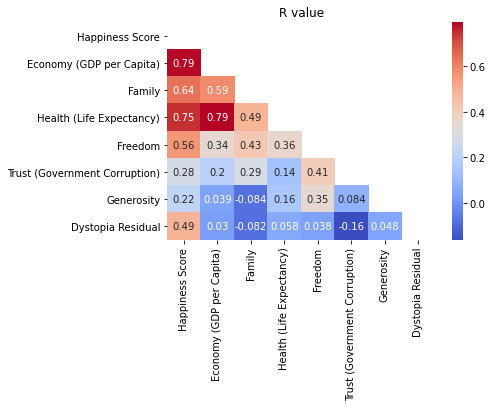

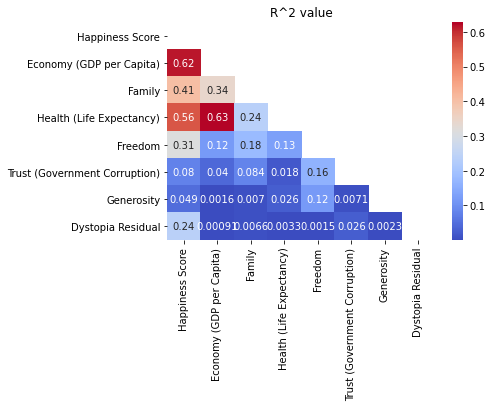

In [47]:
# Hence, we use mask to "mask" or cover those upper tirangle part 
# ones_like return array filled with one and shape with given data, and dtype is boolean so it will fill with boolean True
# Then, triu will keep the top right triangle to true, while keeping bottom left triangle to false
# When we pass this mask to heat map, true will be masked and false will be displayed
mask = np.triu(np.ones_like(attribute.corr(),dtype=np.bool))
sns.heatmap(attribute.corr(), annot=True, mask=mask, cmap="coolwarm").set_title("R value")
plt.figure()
sns.heatmap(attribute.corr()**2, annot=True, mask=mask, cmap="coolwarm").set_title("R^2 value")

The above heat map represents not only the happiness score to other 6 features, but also compare every six features to each other.     
As we can see, the quantifiable value, such as Economy and Health, has a significant $R^2$ value.   
I was quite surprised that Family value still has quite a high $R^2$ value because social support is difficult to quantify. And as I thought, Freedom, Trust, and generosity are all low correlation due to its vague measurement. 

## Regression

Text(0.5, 1.1, 'Happiness Score Regression')

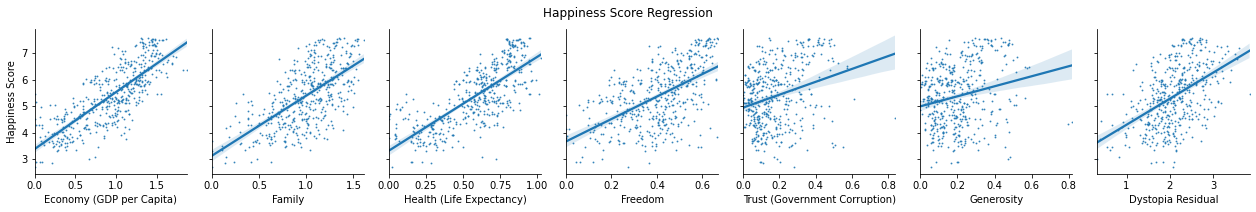

In [48]:
x_vars = attribute.iloc[:,1:].columns.tolist()
y_vars = 'Happiness Score'
# Create grid of graph, with y axis being y_vars, and x_axis beign x_bars
g = sns.PairGrid(data, y_vars=[y_vars, ], x_vars=x_vars)
# Plot reggression plot to each grid, and change the size of the bubble by scatter_kws
# map will map the sns.regplot to g, and then also apply the scatter dictionary as optional 
g.map(sns.regplot, scatter_kws={'s':0.8})
# Add suptitle, default value will over lap on the graph, so scale it slightly up by y
g.fig.suptitle("Happiness Score Regression", y =1.1)
# y_vars

The above regression confirms the correlation between happiness socre and Economy, Family, health and freedom.  

## Regression: Yearly Analysis


Text(0.5, 1.1, 'Happiness Score Regression')

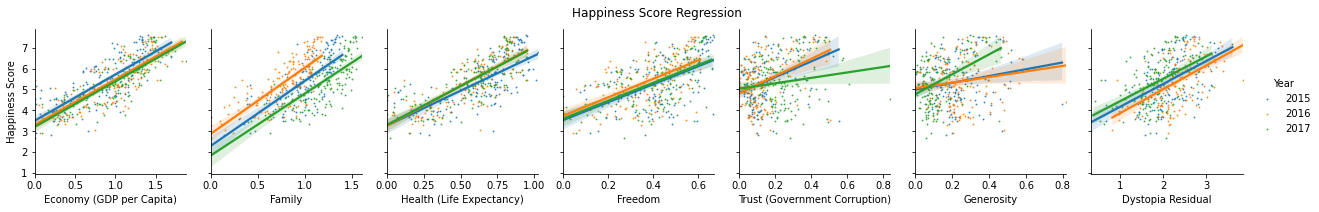

In [19]:
# Create grid of graph, with y axis being y_vars, and x_axis beign x_bars
g = sns.PairGrid(data, y_vars=[y_vars, ], x_vars=x_vars, hue="Year")
# Plot reggression plot to each grid, and change the size of the bubble by scatter_kws
g.map(sns.regplot, scatter_kws={'s':0.8})
g.add_legend()
# Add suptitle, default value will over lap on the graph, so scale it slightly up by y
g.fig.suptitle("Happiness Score Regression", y =1.1)
# y_vars

The above graph represents the happiness score to other features in different years. 
- There is no significant different over year in Economy, Health, and freedom categories.
- The Trust and generosity has a shift in slope 

## Summary
- The highest correlation to happiness score is Economy in terms of $R$ and $R^2$-value. 
    - If the GDP of the country is high, the life standard in the country should be high, resulting in a high happiness
- The second highest correlation to happiness score is Health or life expectancy 
    - If the life expectancy is high, there are less external factors for the people to worry about, such as famine, war, not enough health care and so on, resulting in a high happiness